Nuevamente, definimos modelos con la diferencia de que usamos el dataframe *df_train_arreglado1.csv* creado en *PreprocesadoTrainSinComentarios.ipynb*. 

Recordemos también que existen 2 nuevas variables: 
+ PV_precio_anterior: Si/No
+ PV_cantidad_imagenes: Cantidad de imágenes que tiene asociadas el piso

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('df_train_arreglado1.csv', sep = '|', encoding='utf-8')

In [2]:
df.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,TARGET,PV_precio_anterior,PV_longitud_descripcion,PV_longitud_distribucion,PV_cantidad_imagenes,PV_ind_elasticidad,Viejos,Medios,Nuevos,PV_clase_piso
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,35.00,35.00,0,...,32.16,True,397,0,5,2.0,0.00,0.27,0.72,Nuevos
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,151.98,151.98,2,...,30.71,False,0,0,3,2.0,0.24,0.36,0.40,Nuevos
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,63.48,False,226,13,10,3.0,0.30,0.22,0.47,Nuevos
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,108.27,True,149,0,2,3.0,0.14,0.08,0.79,Nuevos
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,7.50,True,149,0,2,3.0,0.14,0.08,0.79,Nuevos


# Transformación de variables

In [3]:
# Añadimos una nueva variable que es si la longitud de la descripción es nula, va de 0 a 1000 carácteres, ó supera los 1000
df['PV_longitud_descripcion2'] = pd.cut(df['PV_longitud_descripcion'], bins = [-1,0,1000, np.inf], labels=['Ninguna', 'Media', 'Larga'], include_lowest=False)

# Precio de euro el metro
df['PV_precio_metro'] = df.HY_precio/df.HY_metros_totales

# Cambiamos Provincias por 'Castellón','Murcia','Almería','Valencia','Otros'
def estructurar_provincias(x):
    '''
    Funcion que asocia a x (Nombre de provincia) su clase
    '''
    # Lista de clases que nos queremos quedar
    if x in ['Castellón','Murcia','Almería','Valencia']:
        return x
    else:
        return 'Otros'
df['PV_provincia'] = df.HY_provincia.apply(lambda x: estructurar_provincias(x))

# Una nueva que es si el  inmueble presenta alguna distribución
df.loc[df['PV_longitud_distribucion'] > 0,'PV_longitud_distribucion'] = 1

# Cambiamos certificado energetico a Si/No (1/0)
df['PV_cert_energ'] = df['HY_cert_energ'].apply(lambda x: np.sum(x != 'No'))

# Cambiamos las categorías de HY_tipo a solo 3: [Piso, Garaje, Otros]
def CategorizarHY_tipo(dato):
    if dato in ['Piso', 'Garaje']:
        return dato
    else:
        return 'Otros'
df['PV_tipo'] = df['HY_tipo'].apply(CategorizarHY_tipo)

# Cambiamos la variable Garaje a Tiene/No tiene (1/0)
df.loc[df['HY_num_garajes']>1,'HY_num_garajes'] = 1

# Cambiamos baños por 0, 1, +1 (No tiene, tiene 1, tiene mas de 1)
df['PV_num_banos'] = pd.cut(df['HY_num_banos'], [-1,0,1,np.inf], labels = [0,1,'+1'])

# Cambiamos Num terrazas a Si/No (1/0)
df.loc[df['HY_num_terrazas']>1, 'HY_num_terrazas'] = 1

# Variables a eliminar
+ HY_id $\longrightarrow$
+ HY_cod_postal $\longrightarrow$
+ HY_provincia $\longrightarrow$
+ HY_descripcion $\longrightarrow$
+ HY_distribucion $\longrightarrow$
+ HY_tipo $\longrightarrow$
+ HY_antiguedad $\longrightarrow$
+ HY_num_banos $\longrightarrow$
+ HY_cert_energ $\longrightarrow$
+ HY_num_garajes $\longrightarrow$
+ IDEA_area $\longrightarrow$
+ IDEA_poblacion $\longrightarrow$
+ IDEA_densidad $\longrightarrow$
+ IDEA_ind_elasticidad $\longrightarrow$
+ Viejos $\longrightarrow$
+ Medios $\longrightarrow$
+ Nuevos $\longrightarrow$

In [4]:
drop_vars = ['HY_id', 'HY_cod_postal', 'HY_provincia', 'HY_descripcion',
             'HY_distribucion', 'HY_tipo', 'HY_antiguedad','HY_num_banos', 'HY_cert_energ',
             'HY_num_garajes', 'IDEA_pc_1960', 'IDEA_area', 'IDEA_poblacion', 'IDEA_densidad', 'IDEA_ind_elasticidad',
             'Viejos', 'Medios','Nuevos']

In [65]:
X = df.drop(drop_vars+['TARGET'],axis = 1)
y = df.TARGET.copy()

# Transformación de la variable respuesta.

Proponemos log(y+1) como transformación posible, ya que la variable respuesta presenta ceros entre sus valores.


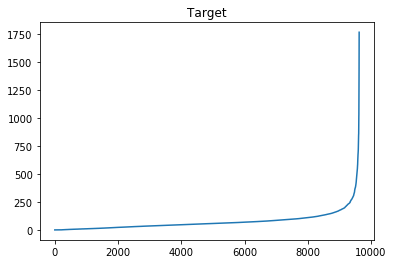

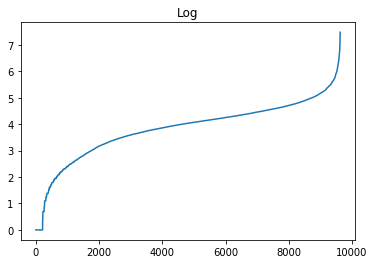

In [6]:
plt.plot(y.sort_values().values)
plt.title('Target')
plt.show()
plt.plot(np.log(y+1).sort_values().values)
plt.title('Log')
plt.show()

In [66]:
y_log = np.log(y+1)

# Variables Dummy

In [8]:
dummy_vars = ['PV_provincia','PV_longitud_descripcion2',
              'PV_clase_piso','PV_tipo','PV_num_banos']

pd.get_dummies(X[dummy_vars]).head()

,PV_provincia_Almería,PV_provincia_Castellón,PV_provincia_Murcia,PV_provincia_Otros,PV_provincia_Valencia,PV_longitud_descripcion2_Ninguna,PV_longitud_descripcion2_Media,PV_longitud_descripcion2_Larga,PV_clase_piso_Medios,PV_clase_piso_Nuevos,PV_clase_piso_Viejos,PV_tipo_Garaje,PV_tipo_Otros,PV_tipo_Piso,PV_num_banos_0,PV_num_banos_1,PV_num_banos_+1
0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [67]:
######## Tiene un Nan ######
#v = X.PV_precio_metro.isnull() == False
#y = y[v]
#y_log = y_log[v]
#X = X[v]
# Unimos nuestro conjunto con el de dummies
X = X.join(pd.get_dummies(X[dummy_vars]))

# Eliminamos las variables que ya n necesitamos
X = X.drop(dummy_vars, axis=1)

In [10]:
X.head()

,HY_metros_utiles,HY_metros_totales,HY_num_terrazas,HY_ascensor,HY_trastero,HY_precio,HY_precio_anterior,IDEA_pc_1960,IDEA_pc_1960_69,IDEA_pc_1970_79,...,PV_longitud_descripcion2_Larga,PV_clase_piso_Medios,PV_clase_piso_Nuevos,PV_clase_piso_Viejos,PV_tipo_Garaje,PV_tipo_Otros,PV_tipo_Piso,PV_num_banos_0,PV_num_banos_1,PV_num_banos_+1
0,35.00,35.00,0,0,0,12300.0,12300.0,0.00,0.00,0.00,...,0,0,1,0,1,0,0,1,0,0
1,151.98,151.98,0,0,0,115000.0,125000.0,0.12,0.12,0.18,...,0,0,1,0,0,1,0,0,0,1
2,92.58,102.78,0,1,0,88000.0,93500.0,0.15,0.15,0.12,...,0,0,1,0,0,0,1,0,1,0
3,11.81,12.46,0,1,0,5800.0,5800.0,0.07,0.07,0.04,...,0,0,1,0,1,0,0,1,0,0
4,14.29,15.43,0,1,0,7400.0,7400.0,0.07,0.07,0.04,...,0,0,1,0,1,0,0,1,0,0


# Modelos

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_log_train, y_log_test = train_test_split(X, y, y_log, test_size=0.3, random_state=7)

In [15]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Métrica
from sklearn.metrics import median_absolute_error

In [13]:
models = {
    'SVR':svm.SVR(),
    'KNeighborsRegressor5':neighbors.KNeighborsRegressor(5, weights='uniform'),# Admite 'distance'
    'KNeighborsRegressor10':neighbors.KNeighborsRegressor(10, weights='uniform'),
    'KNeighborsRegressor15':neighbors.KNeighborsRegressor(15, weights='uniform'),
    'KNeighborsRegressor25':neighbors.KNeighborsRegressor(25, weights='uniform'),
    'KNeighborsRegressor15dist':neighbors.KNeighborsRegressor(15, weights='distance'),
    'DecisionTreeRegressor5':tree.DecisionTreeRegressor(max_depth = 5),
    'DecisionTreeRegressor10':tree.DecisionTreeRegressor(max_depth = 10),
    'DecisionTreeRegressor10':tree.DecisionTreeRegressor(max_depth = 20),
    'RandomForestRegressor20':RandomForestRegressor(max_depth=5, n_estimators = 20, random_state=0),
    'RandomForestRegressor40':RandomForestRegressor(max_depth=3, n_estimators = 40, random_state=0),
    'RandomForestRegressor50':RandomForestRegressor(max_depth=10, n_estimators = 50, random_state=0),
    'RandomForestRegressor100':RandomForestRegressor(max_depth=10, n_estimators = 100, random_state=0),
    'RandomForestRegressor150':RandomForestRegressor(max_depth=10, n_estimators = 150, random_state=0),
    'ExtraTreesRegressor10':ExtraTreesRegressor(n_estimators=10,random_state=0),
    'ExtraTreesRegressor50':ExtraTreesRegressor(n_estimators=50,random_state=0),
    'ExtraTreesRegressor100':ExtraTreesRegressor(n_estimators=100, random_state=0),
    'ExtraTreesRegressor150':ExtraTreesRegressor(n_estimators=150, random_state=0),
    'GradientBoostingRegressor30':GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'),
    'GradientBoostingRegressor50':GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'),
    'GradientBoostingRegressor100':GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
    }

In [15]:
from sklearn.metrics import median_absolute_error
y_test_predict = {}
y_log_test_predict = {}
errores = {}
errores_log = {}
importances = {}
for name, model in models.items():
    #try:
    model = model.fit(X_train, y_train)
    y_test_predict[name] = model.predict(X_test)
    errores[name] = median_absolute_error(y_test, y_test_predict[name])
    
    model_log = model.fit(X_train, y_log_train)
    y_log_test_predict[name] = model_log.predict(X_test)
    errores_log[name] = median_absolute_error(np.exp(y_log_test)-1, np.exp(y_log_test_predict[name])-1)
    
    print(name,': ', errores[name], ' ||| ', errores_log[name], sep = '')
    #except:
        #print('Error con '+name)

SVR: 30.28 ||| 27.84068449342901
KNeighborsRegressor5: 31.929999999999996 ||| 25.90990236563771
KNeighborsRegressor10: 32.017500000000005 ||| 24.88743670999665
KNeighborsRegressor15: 32.265666666666675 ||| 23.12546016584411
KNeighborsRegressor25: 32.7268 ||| 23.674247260703343
KNeighborsRegressor15dist: 29.291128784289345 ||| 24.003123452238555
DecisionTreeRegressor5: 31.76258139534887 ||| 20.938027316459333
DecisionTreeRegressor10: 26.5625 ||| 28.181721361737495
RandomForestRegressor20: 32.35689482073033 ||| 20.459855019380853
RandomForestRegressor40: 33.843001776221655 ||| 21.12779728411983
RandomForestRegressor50: 30.614654457675535 ||| 19.87602883357131
RandomForestRegressor100: 30.38811180792194 ||| 19.84937669768137
RandomForestRegressor150: 30.431158096293522 ||| 19.83523647016101
ExtraTreesRegressor10: 27.006000000000004 ||| 20.720071752482426
ExtraTreesRegressor50: 27.39500000000001 ||| 19.789429446331955
ExtraTreesRegressor100: 27.826500000000003 ||| 20.195589061925233
ExtraT

Por lo que evidentemente tenemos una mejor precisión tras realizar la transformación del logaritmo

In [13]:
models = {
    'SVR':svm.SVR(),
    'KNeighborsRegressor5':neighbors.KNeighborsRegressor(5, weights='uniform'),# Admite 'distance'
    'KNeighborsRegressor10':neighbors.KNeighborsRegressor(10, weights='uniform'),
    'KNeighborsRegressor15':neighbors.KNeighborsRegressor(15, weights='uniform'),
    'KNeighborsRegressor25':neighbors.KNeighborsRegressor(25, weights='uniform'),
    'KNeighborsRegressor15dist':neighbors.KNeighborsRegressor(15, weights='distance'),
    'DecisionTreeRegressor5':tree.DecisionTreeRegressor(max_depth = 5),
    'DecisionTreeRegressor10':tree.DecisionTreeRegressor(max_depth = 10),
    'DecisionTreeRegressor10':tree.DecisionTreeRegressor(max_depth = 20),
    'RandomForestRegressor20':RandomForestRegressor(max_depth=5, n_estimators = 20, random_state=0),
    'RandomForestRegressor40':RandomForestRegressor(max_depth=3, n_estimators = 40, random_state=0),
    'RandomForestRegressor50':RandomForestRegressor(max_depth=10, n_estimators = 50, random_state=0),
    'RandomForestRegressor100':RandomForestRegressor(max_depth=10, n_estimators = 100, random_state=0),
    'RandomForestRegressor150':RandomForestRegressor(max_depth=10, n_estimators = 150, random_state=0),
    'ExtraTreesRegressor10':ExtraTreesRegressor(n_estimators=10,random_state=0),
    'ExtraTreesRegressor50':ExtraTreesRegressor(n_estimators=50,random_state=0),
    'ExtraTreesRegressor100':ExtraTreesRegressor(n_estimators=100, random_state=0),
    'ExtraTreesRegressor150':ExtraTreesRegressor(n_estimators=150, random_state=0),
    'GradientBoostingRegressor30':GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'),
    'GradientBoostingRegressor50':GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'),
    'GradientBoostingRegressor100':GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
    }

def EntrenarModelos(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    
    y_test_predict = {}
    errores = {}
    
    for name, model in models.items():
        #try:
        model = model.fit(X_train, y_train)
        y_test_predict[name] = model.predict(X_test)
        errores[name] = median_absolute_error(np.exp(y_test)-1, np.exp(y_test_predict[name])-1)
        
        print(name,': ', errores[name], sep = '')

# Eliminando outliers de la variable respuesta

In [18]:
cota = y_log_train.mean()+3*y_log_train.std()
np.exp(y_log_train[y_log_train>cota])

8339    1396.0
8913    1605.0
5850    1333.0
Name: TARGET, dtype: float64

In [20]:
cota = y_train.mean()+3*y_train.std()
np.sum(y_train>cota)

102

In [21]:
np.sum(y_test>cota)

62

In [22]:
y_test.max()

1770.0

In [31]:
cota = y_log.mean()+3*y_log.std()
print('{} outliers serán eliminados'.format(np.sum(y_log>cota)))
EntrenarModelos(X[y_log<=cota],y_log[y_log<=cota], models)

5 outliers serán eliminados
SVR: 28.27952482677657
KNeighborsRegressor5: 27.322195571663272
KNeighborsRegressor10: 25.591982917180765
KNeighborsRegressor15: 24.99801999546895
KNeighborsRegressor25: 24.803915988201002
KNeighborsRegressor15dist: 25.22123444386213
DecisionTreeRegressor5: 20.63452407989235
DecisionTreeRegressor10: 27.50499999999999
RandomForestRegressor20: 20.651704032982934
RandomForestRegressor40: 21.522707019795817
RandomForestRegressor50: 19.87316470311766
RandomForestRegressor100: 20.00183463729004
RandomForestRegressor150: 19.951471028724516
ExtraTreesRegressor10: 21.22555738027949
ExtraTreesRegressor50: 19.915335107421335
ExtraTreesRegressor100: 20.2099538242747
ExtraTreesRegressor150: 20.300319526641886
GradientBoostingRegressor30: 22.33570508056432
GradientBoostingRegressor50: 21.794285053700307
GradientBoostingRegressor100: 21.192769020497117


In [32]:
cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))
EntrenarModelos(X[y<=cota],y_log[y<=cota], models)

147 outliers serán eliminados
SVR: 27.313791824043037
KNeighborsRegressor5: 24.334654105899737
KNeighborsRegressor10: 23.695434197190412
KNeighborsRegressor15: 23.330681366017316
KNeighborsRegressor25: 23.689491648322715
KNeighborsRegressor15dist: 23.005390122207313
DecisionTreeRegressor5: 19.263344031414782
DecisionTreeRegressor10: 24.30075554773891
RandomForestRegressor20: 19.010427634175024
RandomForestRegressor40: 19.778709490321845
RandomForestRegressor50: 18.19303093908769
RandomForestRegressor100: 18.046376437300744
RandomForestRegressor150: 18.140253964960266
ExtraTreesRegressor10: 19.58601402949884
ExtraTreesRegressor50: 18.937296413257556
ExtraTreesRegressor100: 18.781256777708933
ExtraTreesRegressor150: 18.44916370867773
GradientBoostingRegressor30: 20.74513070164841
GradientBoostingRegressor50: 20.112123549947857
GradientBoostingRegressor100: 19.71277806910018


# XGBoost

In [17]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

model = {'XGB50':XGBRegressor(max_depth = 10, n_estimators= 50, random_state=7),
        'XGB100':XGBRegressor(max_depth = 10, n_estimators= 100, random_state=7),
        'XGB150':XGBRegressor(max_depth = 10, n_estimators= 150, random_state=7),
        'XGB_lambda':XGBRegressor(max_depth = 10, n_estimators= 150, random_state=7, reg_lambda=0.9)}

cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))
EntrenarModelos(X[y<=cota],y_log[y<=cota], model)

147 outliers serán eliminados
XGB50: 17.748072280883804
XGB100: 18.505607299804677
XGB150: 18.71764083862303
XGB_lambda: 18.504156150817867


In [19]:
# Entrenamos varios XGBoost
models = {}
for i in range(10,100, 10):
    models['XGB_{}'.format(i)] = XGBRegressor(max_depth = 10, n_estimators= i, random_state=7)
#print('Models:', models)

cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))
EntrenarModelos(X[y<=cota],y_log[y<=cota], models)

147 outliers serán eliminados
XGB_10: 40.24867446899414
XGB_20: 21.41231891632081
XGB_30: 17.99929534912111
XGB_40: 17.722598953247072
XGB_50: 17.748072280883804
XGB_60: 18.21484733581542
XGB_70: 18.28358825683594
XGB_80: 18.362930374145506
XGB_90: 18.364181823730465


In [20]:
# Entrenamos varios XGBoost
models = {}
for i in range(20,65, 5):
    models['XGB_{}'.format(i)] = XGBRegressor(max_depth = 10, n_estimators= i, random_state=7)
#print('Models:', models)

cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))
EntrenarModelos(X[y<=cota],y_log[y<=cota], models)

147 outliers serán eliminados
XGB_20: 21.41231891632081
XGB_25: 18.948085250854497
XGB_30: 17.99929534912111
XGB_35: 17.85314559936524
XGB_40: 17.722598953247072
XGB_45: 17.704650421142574
XGB_50: 17.748072280883804
XGB_55: 18.2246732711792
XGB_60: 18.21484733581542


In [21]:
# Entrenamos varios XGBoost
models = {}
for i in range(30,55, 2):
    models['XGB_{}'.format(i)] = XGBRegressor(max_depth = 10, n_estimators= i, random_state=7)
#print('Models:', models)

cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))
EntrenarModelos(X[y<=cota],y_log[y<=cota], models)

147 outliers serán eliminados
XGB_30: 17.99929534912111
XGB_32: 17.657295265197753
XGB_34: 17.840322494506832
XGB_36: 17.743897705078137
XGB_38: 17.698133468627933
XGB_40: 17.722598953247072
XGB_42: 17.587086029052706
XGB_44: 17.759080123901366
XGB_46: 17.50161647796631
XGB_48: 17.767679443359366
XGB_50: 17.748072280883804
XGB_52: 17.824757232666002
XGB_54: 18.104386062622062


In [22]:
# Entrenamos varios XGBoost
models = {}
for i in range(30,55, 1):
    models['XGB_{}'.format(i)] = XGBRegressor(max_depth = 10, n_estimators= i, random_state=7)
#print('Models:', models)

cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))
EntrenarModelos(X[y<=cota],y_log[y<=cota], models)

147 outliers serán eliminados
XGB_30: 17.99929534912111
XGB_31: 17.858248748779296
XGB_32: 17.657295265197753
XGB_33: 17.78284671783446
XGB_34: 17.840322494506832
XGB_35: 17.85314559936524
XGB_36: 17.743897705078137
XGB_37: 17.715836410522453
XGB_38: 17.698133468627933
XGB_39: 17.74742202758789
XGB_40: 17.722598953247072
XGB_41: 17.628169784545896
XGB_42: 17.587086029052706
XGB_43: 17.602094116210928
XGB_44: 17.759080123901366
XGB_45: 17.704650421142574
XGB_46: 17.50161647796631
XGB_47: 17.65002944946289
XGB_48: 17.767679443359366
XGB_49: 17.749590225219738
XGB_50: 17.748072280883804
XGB_51: 17.79204822540283
XGB_52: 17.824757232666002
XGB_53: 17.940932159423824
XGB_54: 18.104386062622062


Por lo que tenemos que el modelo que mayor acierto tiene es el XGB con 46 árboles. Pero para asegurarnos, vamos a utilizar KFolds

### KFolds and XGBoost

Primero, hemos demostrado que obtenemos unos mejores resultados eliminando los Outliers, por lo que vamos a proceder a eliminarlos definitivamente

In [68]:
cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))

# Nota: El reset index es para uniformidad del índice, ya que se salta los valores que eliminamos 
#       (Y con drop = True no crea una nueva columna llamada "index")
X = X[y<=cota].reset_index(drop = True)
y_log = y_log[y<=cota].reset_index(drop = True)
y = y[y<=cota].reset_index(drop = True)

147 outliers serán eliminados


Y ahora procedemos a realizar un GridSearch con XGBoost para XGBoost

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [24]:
p_grid = {"n_estimators": np.arange(20,175,25),
          "reg_lambda": np.arange(0.5,1.1,0.1)} # REcordemos que el último valor no entra dentro del range de np

inner_cv = KFold(n_splits=5, shuffle=True, random_state=7)
xgb_model = XGBRegressor(max_depth = 10, random_state=7)

xgb_kv = GridSearchCV(estimator=xgb_model, param_grid=p_grid, cv=inner_cv)

cota = y.mean()+3*y.std()
print('{} outliers serán eliminados'.format(np.sum(y>cota)))

X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.3, random_state=7)
xgb_kv.fit(X_train,y_log_train)

147 outliers serán eliminados


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140]), 'reg_lambda': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
xgb_kv.best_params_

{'n_estimators': 40, 'reg_lambda': 1.0999999999999999}

In [30]:
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.3, random_state=7)

In [33]:
best_model = xgb_kv.best_estimator_

y_test_predict = best_model.predict(X_test)
median_absolute_error(np.exp(y_log_test)-1, np.exp(y_test_predict)-1)

18.862736282348635

Los resultados son interesantes, pero como requiere demasiado tiempo (~10 min), creamos el cross validation manualmente.

In [36]:
models = {
    'KNeighborsRegressor5':neighbors.KNeighborsRegressor(5, weights='uniform'),# Admite 'distance'
    'KNeighborsRegressor10':neighbors.KNeighborsRegressor(10, weights='uniform'),
    'KNeighborsRegressor15':neighbors.KNeighborsRegressor(15, weights='uniform'),
    'KNeighborsRegressor25':neighbors.KNeighborsRegressor(25, weights='uniform'),
    'KNeighborsRegressor15dist':neighbors.KNeighborsRegressor(15, weights='distance'),
    'DecisionTreeRegressor5':tree.DecisionTreeRegressor(max_depth = 5),
    'DecisionTreeRegressor10':tree.DecisionTreeRegressor(max_depth = 10),
    'DecisionTreeRegressor10':tree.DecisionTreeRegressor(max_depth = 20),
    'RandomForestRegressor20':RandomForestRegressor(max_depth=5, n_estimators = 20, random_state=0),
    'RandomForestRegressor40':RandomForestRegressor(max_depth=3, n_estimators = 40, random_state=0),
    'RandomForestRegressor50':RandomForestRegressor(max_depth=10, n_estimators = 50, random_state=0),
    'RandomForestRegressor100':RandomForestRegressor(max_depth=10, n_estimators = 100, random_state=0),
    'RandomForestRegressor150':RandomForestRegressor(max_depth=10, n_estimators = 150, random_state=0),
    'ExtraTreesRegressor10':ExtraTreesRegressor(n_estimators=10,random_state=0),
    'ExtraTreesRegressor50':ExtraTreesRegressor(n_estimators=50,random_state=0),
    'ExtraTreesRegressor100':ExtraTreesRegressor(n_estimators=100, random_state=0),
    'ExtraTreesRegressor150':ExtraTreesRegressor(n_estimators=150, random_state=0),
    'GradientBoostingRegressor30':GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'),
    'GradientBoostingRegressor50':GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'),
    'GradientBoostingRegressor100':GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'),
    'GradientBoostingRegressor30_md5':GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=5, random_state=0, loss='ls'),
    'GradientBoostingRegressor50_md5':GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=0, loss='ls'),
    'GradientBoostingRegressor100_md5':GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0, loss='ls'),
    'GradientBoostingRegressor30_md10':GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=10, random_state=0, loss='ls'),
    'GradientBoostingRegressor50_md10':GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=10, random_state=0, loss='ls'),
    'GradientBoostingRegressor100_md10':GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0, loss='ls'),
    'XGB25':XGBRegressor(max_depth = 10, n_estimators=25, random_state=7),
    'XGB46':XGBRegressor(max_depth = 10, n_estimators=46, random_state=7),
    'XGB60':XGBRegressor(max_depth = 10, n_estimators=60, random_state=7),
    'XGB100':XGBRegressor(max_depth = 10, n_estimators=100, random_state=7),
    'XGB40_md15':XGBRegressor(max_depth = 15, n_estimators=50, random_state=7)
    }

In [77]:
from sklearn.model_selection import KFold

# Número de splits
k = 5
kf = KFold(n_splits=k)

# Inicializamos el diccionario de errores (Para cada modelo tendremos una lista de errores asociada)
errores = {}
for name, model in models.items():
    errores[name] = []

for train_index, test_index in kf.split(X):
    
    for name, model in models.items():
        #try:
        model = model.fit(X.loc[train_index], y_log[train_index])
        y_test_predict = model.predict(X.loc[test_index])
        # Añadimos el error a nuestra lista
        errores[name].append(median_absolute_error(np.exp(y_log[test_index])-1, np.exp(y_test_predict)-1))

# Mostramos la media de los errores
for name, model in models.items():
    print(name,': ', np.mean(errores[name]), sep = '')

KNeighborsRegressor5: 27.50205278685425
KNeighborsRegressor10: 25.74249415874173
KNeighborsRegressor15: 25.55408231493341
KNeighborsRegressor25: 24.996226790623
KNeighborsRegressor15dist: 25.51864856518825
DecisionTreeRegressor5: 19.836560435427394
DecisionTreeRegressor10: 27.370658241941054
RandomForestRegressor20: 19.253022794947423
RandomForestRegressor40: 20.090052253160092
RandomForestRegressor50: 19.41086406917274
RandomForestRegressor100: 19.374997620380153
RandomForestRegressor150: 19.280992854111215
ExtraTreesRegressor10: 20.91758747645381
ExtraTreesRegressor50: 20.019675004956355
ExtraTreesRegressor100: 19.666861997057932
ExtraTreesRegressor150: 19.78909320326064
GradientBoostingRegressor30: 20.493258874778853
GradientBoostingRegressor50: 20.177306765868767
GradientBoostingRegressor100: 19.958963086528428
GradientBoostingRegressor30_md5: 19.205948829644587
GradientBoostingRegressor50_md5: 19.197416379552898
GradientBoostingRegressor100_md5: 19.39166305619664
GradientBoostingR

In [80]:
for name, model in models.items():
    print(name,': ', ['{:.2f}'.format(i) for i in errores[name]], sep = '')

KNeighborsRegressor5: ['22.56', '23.15', '33.83', '28.80', '29.18']
KNeighborsRegressor10: ['20.42', '21.42', '31.84', '27.90', '27.13']
KNeighborsRegressor15: ['19.76', '21.22', '31.83', '28.35', '26.62']
KNeighborsRegressor25: ['19.29', '20.80', '31.07', '27.74', '26.09']
KNeighborsRegressor15dist: ['19.79', '21.13', '31.67', '28.23', '26.77']
DecisionTreeRegressor5: ['18.16', '18.07', '22.77', '19.24', '20.94']
DecisionTreeRegressor10: ['21.27', '22.85', '31.60', '29.47', '31.66']
RandomForestRegressor20: ['17.59', '17.57', '22.06', '19.00', '20.05']
RandomForestRegressor40: ['19.60', '18.89', '22.87', '18.57', '20.52']
RandomForestRegressor50: ['16.76', '16.89', '22.63', '20.06', '20.72']
RandomForestRegressor100: ['16.90', '16.97', '22.40', '19.98', '20.63']
RandomForestRegressor150: ['16.82', '16.93', '22.44', '19.80', '20.41']
ExtraTreesRegressor10: ['17.30', '17.91', '25.67', '21.92', '21.79']
ExtraTreesRegressor50: ['16.65', '17.18', '23.93', '21.08', '21.27']
ExtraTreesRegres

In [81]:
from sklearn.model_selection import KFold

# Número de splits
k = 10
kf = KFold(n_splits=k)

# Inicializamos el diccionario de errores (Para cada modelo tendremos una lista de errores asociada)
errores = {}
for name, model in models.items():
    errores[name] = []

for train_index, test_index in kf.split(X):
    
    for name, model in models.items():
        #try:
        model = model.fit(X.loc[train_index], y_log[train_index])
        y_test_predict = model.predict(X.loc[test_index])
        # Añadimos el error a nuestra lista
        errores[name].append(median_absolute_error(np.exp(y_log[test_index])-1, np.exp(y_test_predict)-1))

# Mostramos la media de los errores
for name, model in models.items():
    print(name,': ', np.mean(errores[name]), sep = '')

KNeighborsRegressor5: 27.39223164371806
KNeighborsRegressor10: 25.558651926082195
KNeighborsRegressor15: 25.40453848259561
KNeighborsRegressor25: 24.99807754056483
KNeighborsRegressor15dist: 25.406471956987996
DecisionTreeRegressor5: 19.889829577239198
DecisionTreeRegressor10: 27.284846148846658
RandomForestRegressor20: 19.117218568811033
RandomForestRegressor40: 19.91315671854769
RandomForestRegressor50: 19.210135882797424
RandomForestRegressor100: 19.07730268422388
RandomForestRegressor150: 19.066578880115696
ExtraTreesRegressor10: 21.345706247534018
ExtraTreesRegressor50: 20.06667359459412
ExtraTreesRegressor100: 19.95230244889372
ExtraTreesRegressor150: 19.73015179241431
GradientBoostingRegressor30: 20.716843120619234
GradientBoostingRegressor50: 20.163057536114945
GradientBoostingRegressor100: 19.875476537776592
GradientBoostingRegressor30_md5: 19.134249290424258
GradientBoostingRegressor50_md5: 19.13418690926319
GradientBoostingRegressor100_md5: 19.33318344227876
GradientBoosting

In [82]:
for name, model in models.items():
    print(name,': ', ['{:.2f}'.format(i) for i in errores[name]], sep = '')

KNeighborsRegressor5: ['20.52', '24.03', '21.56', '24.40', '34.93', '32.62', '29.63', '28.41', '28.24', '29.57']
KNeighborsRegressor10: ['18.87', '21.39', '19.88', '22.78', '32.52', '30.77', '28.86', '26.92', '26.46', '27.14']
KNeighborsRegressor15: ['18.26', '20.82', '19.01', '22.35', '31.36', '32.26', '29.67', '28.12', '26.40', '25.79']
KNeighborsRegressor25: ['17.83', '20.57', '19.65', '21.27', '31.01', '31.22', '29.53', '27.01', '25.25', '26.64']
KNeighborsRegressor15dist: ['18.61', '20.85', '19.17', '23.20', '31.67', '30.51', '30.16', '27.19', '26.32', '26.39']
DecisionTreeRegressor5: ['17.54', '18.36', '16.69', '19.37', '23.33', '21.40', '18.72', '21.45', '21.01', '21.04']
DecisionTreeRegressor10: ['22.42', '22.28', '21.58', '24.62', '32.75', '31.59', '29.57', '34.11', '28.41', '25.53']
RandomForestRegressor20: ['16.65', '17.94', '16.22', '18.27', '22.85', '21.17', '18.14', '20.26', '19.53', '20.15']
RandomForestRegressor40: ['18.43', '18.66', '16.94', '19.49', '24.49', '21.31', 

**Nota:** Parece que tenemos suerte y en los primeros KFolds nuestro conjunto de train se parece al de test, pero en el resto no tenemos esa suerte.

# Ensemble

Como base de nuestro Ensemble emplearemos los siguientes modelos:
+ DecisionTreeRegressor5
+ RandomForestRegressor50
+ ExtraTreesRegressor100
+ GradientBoostingRegressor50_md5
+ XGB46

In [104]:
ensemble_models = {
    'DecisionTreeRegressor5':tree.DecisionTreeRegressor(max_depth = 5),
    'RandomForestRegressor50':RandomForestRegressor(max_depth=10, n_estimators = 50, random_state=0),
    'ExtraTreesRegressor100':ExtraTreesRegressor(n_estimators=100, random_state=0),
    'GradientBoostingRegressor50_md5':GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=0, loss='ls'),
    'XGB46':XGBRegressor(max_depth = 10, n_estimators=46, random_state=7)
}

Definición de los conjuntos de train y test junto a la matriz donde almacenaremos las predicciones de nuestros modelos.

In [105]:
X_train_ensemble, X_test_ensemble, y_log_train_ensemble, y_log_test_ensemble = train_test_split(X, y_log, test_size=0.3, random_state=7)

# Conjuntos sobre los que trabajaremos
X_train, X_test, y_log_train, y_log_test = train_test_split(X_train_ensemble, y_log_train_ensemble, test_size=0.3, random_state=7)

# Dataframe donde almacenaremos los resultados de nuestros modelos
pred_ensemble_models = pd.DataFrame(data = np.zeros((X_test.shape[0],len(ensemble_models))), 
                                    columns = list(ensemble_models.keys()))
pred_ensemble_models.head()

,DecisionTreeRegressor5,RandomForestRegressor50,ExtraTreesRegressor100,GradientBoostingRegressor50_md5,XGB46
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [106]:
# Procedemos a calcular
for name, model in ensemble_models.items():
    ensemble_models[name] = model.fit(X_train, y_log_train)
    y_test_predict = ensemble_models[name].predict(X_test)
    # Almacenamos la predicción de cada modelo
    pred_ensemble_models[name] = y_test_predict
    
pred_ensemble_models.head()

,DecisionTreeRegressor5,RandomForestRegressor50,ExtraTreesRegressor100,GradientBoostingRegressor50_md5,XGB46
0,3.402059,3.507956,3.512940,3.417132,3.833163
1,3.957825,3.955098,3.858310,3.900227,3.883547
2,3.402059,3.269411,2.361675,3.406051,3.231040
3,4.324712,4.118461,3.830031,3.966737,3.916286
4,4.324712,4.101326,3.883392,4.033560,3.727528


Utilizamos un rf para la predicción final

In [107]:
rf_ensemble_validation = RandomForestRegressor(max_depth=5, n_estimators = 25, random_state=0)
rf_ensemble_validation = rf_ensemble_validation.fit(pred_ensemble_models, y_log_test)


# Dataframe donde almacenaremos los resultados de nuestros modelos
pred_ensemble_models_test = pd.DataFrame(data = np.zeros((X_test_ensemble.shape[0],len(ensemble_models))), 
                                    columns = list(ensemble_models.keys()))
# Procedemos a calcular
for name, model in ensemble_models.items():
    # Predecimos con nuestros modelos sobre el conjunto de test
    y_pred = ensemble_models[name].predict(X_test_ensemble)
    pred_ensemble_models_test[name] = y_pred
    print(name,': ', median_absolute_error(np.exp(y_log_test_ensemble)-1, np.exp(y_pred)-1), sep = '')
    
# Y lo corregimos con el rf_ensemble_validation
y_final_pred = rf_ensemble_validation.predict(pred_ensemble_models_test)

# Calculamos el error
print('-'*50)
print('Ensemble: ', median_absolute_error(np.exp(y_log_test_ensemble)-1, np.exp(y_final_pred)-1), sep = '')

DecisionTreeRegressor5: 19.76465250876292
RandomForestRegressor50: 18.299696101660945
ExtraTreesRegressor100: 18.5464276492524
GradientBoostingRegressor50_md5: 18.585116367292198
XGB46: 18.334793777465848
--------------------------------------------------
Ensemble: 18.95082377140058


Razón por la que empleamos un rf: La propriedad **feature\_importances\_**

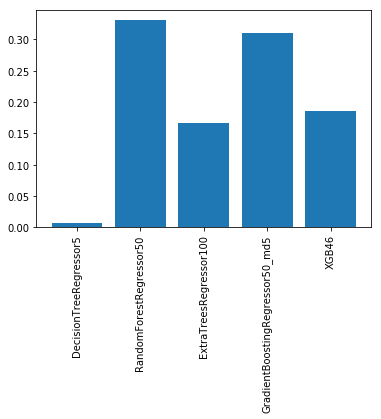

In [108]:
plt.bar(range(len(ensemble_models.keys())), rf_ensemble_validation.feature_importances_)
plt.xticks(range(len(ensemble_models.keys())), list(ensemble_models.keys()), rotation = 90)
plt.show()